In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px


In [ ]:
wd = "/Users/catherinez/VSC/datathon_2024/"

In [ ]:
data = pd.read_csv(wd + "CAERS_ProductBased.csv")

In [ ]:
data

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,Unnamed: 12
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,NaN
1,6/30/2023,2023-CFS-006720,NaN,SUSPECT,ONE A DAY WOMEN'S,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome,NaN
2,6/30/2023,2023-CFS-006718,6/22/2023,SUSPECT,RITUAL ESSENTIAL PRENATAL MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me...",NaN
3,6/30/2023,2023-CFS-006717,NaN,SUSPECT,METAMUCIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me...",NaN
4,6/30/2023,2023-CFS-006714,NaN,SUSPECT,NATURE'S BOUNTY CALCIUM 1200MG PLUS 25MCG (100...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",NaN
206602,5/13/1999,100920,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HEART RATE INCREASED, SYNCOPE",Hospitalization,NaN
206603,5/13/1999,100919,NaN,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room",NaN
206604,5/13/1999,100918,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room",NaN


TO DO:
- product codes - figure out why more codes than descriptions

In [ ]:
def convert_to_years(row):
    age = row['PATIENT_AGE']
    age_units = row['AGE_UNITS']

    if age_units == 'day(s)':
        return age / 365.25
    elif age_units == 'month(s)':
        return age / 12
    elif age_units == 'decade(s)':
        return age * 10
    elif age_units == 'week(s)':
        return age / 52.1775
    else:
        return age

data['PATIENT_AGE_IN_YEARS'] = data.apply(convert_to_years, axis=1)


In [ ]:
data

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,Unnamed: 12,PATIENT_AGE_IN_YEARS
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,NaN,45.0
1,6/30/2023,2023-CFS-006720,NaN,SUSPECT,ONE A DAY WOMEN'S,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome,NaN,NaN
2,6/30/2023,2023-CFS-006718,6/22/2023,SUSPECT,RITUAL ESSENTIAL PRENATAL MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me...",NaN,NaN
3,6/30/2023,2023-CFS-006717,NaN,SUSPECT,METAMUCIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me...",NaN,46.0
4,6/30/2023,2023-CFS-006714,NaN,SUSPECT,NATURE'S BOUNTY CALCIUM 1200MG PLUS 25MCG (100...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",NaN,65.0
206602,5/13/1999,100920,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HEART RATE INCREASED, SYNCOPE",Hospitalization,NaN,NaN
206603,5/13/1999,100919,NaN,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room",NaN,NaN
206604,5/13/1999,100918,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room",NaN,NaN


In [ ]:
data = data.loc[data['PRODUCT'] != 'EXEMPTION 4']
data = data.loc[data['PRODUCT_TYPE'] != 'CONCOMITANT']
data = data.loc[data['REPORT_ID'] != '2023-CFS-003010']

In [ ]:
data = data.drop(columns='Unnamed: 12')

In [ ]:
data

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0
1,6/30/2023,2023-CFS-006720,NaN,SUSPECT,ONE A DAY WOMEN'S,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome,NaN
2,6/30/2023,2023-CFS-006718,6/22/2023,SUSPECT,RITUAL ESSENTIAL PRENATAL MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me...",NaN
3,6/30/2023,2023-CFS-006717,NaN,SUSPECT,METAMUCIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me...",46.0
4,6/30/2023,2023-CFS-006714,NaN,SUSPECT,NATURE'S BOUNTY CALCIUM 1200MG PLUS 25MCG (100...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",65.0
206602,5/13/1999,100920,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HEART RATE INCREASED, SYNCOPE",Hospitalization,NaN
206603,5/13/1999,100919,NaN,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room",NaN
206604,5/13/1999,100918,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room",NaN


In [ ]:
data_nona = data.dropna()

In [ ]:
data = data_nona

In [ ]:
data_sep = data.assign(SEPARATED_OUTCOMES=data['CASE_OUTCOME'].str.split(', ')).explode('SEPARATED_OUTCOMES')

In [ ]:
data_sep

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS,SEPARATED_OUTCOMES
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0,Other Serious or Important Medical Event
5,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0,Life Threatening
5,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0,Hospitalization
5,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0,Other Serious or Important Medical Event
6,6/29/2023,2023-CFS-006687,6/20/2023,SUSPECT,HUEL BLACK EDITION,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event,39.0,Other Serious or Important Medical Event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206591,12/26/2002,67970,11/5/2002,SUSPECT,CROWN PRINCE SARDINES IN TOMATO SAUCE,16,Fishery/Seafood Prod,72.0,year(s),Female,"ABDOMINAL PAIN UPPER, DIARRHOEA, VOMITING","Visited Emergency Room, Visited a Health Care ...",72.0,Visited a Health Care Provider
206593,6/26/2002,80767,5/24/2002,SUSPECT,XENADRINE RFA-1,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization",50.0,Life Threatening
206593,6/26/2002,80767,5/24/2002,SUSPECT,XENADRINE RFA-1,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization",50.0,Hospitalization
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",65.0,Required Intervention


In [ ]:
data_sep.to_csv(wd + "datathon_separated_outcomes.csv")

In [ ]:
death_only = data_sep.loc[data_sep["SEPARATED_OUTCOMES"] == "Death"]


In [ ]:
death_only.reset_index(inplace=True)

In [ ]:
death_only

,index,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS,SEPARATED_OUTCOMES
0,7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.00,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.00,Death
1,395,6/5/2023,2023-CFS-005782,4/15/2023,SUSPECT,PREVAGEN PROFESSIONAL FORMULA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),82.00,year(s),Male,"Asthenia, Death, Decreased appetite, Faeces di...","Death, Other Serious or Important Medical Even...",82.00,Death
2,434,6/2/2023,2023-CFS-005710,4/12/2023,SUSPECT,MOREL MUSHROOMS WILD FORAGED,24,Vegetables/Vegetable Products,69.00,year(s),Male,"Death, Diarrhoea, Malaise, Vomiting",Death,69.00,Death
3,470,5/31/2023,2023-CFS-005627,2/11/2019,SUSPECT,TIENEPTINE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),56.20,year(s),Male,"Death, Overdose","Death, Life Threatening, Hospitalization",56.20,Death
4,618,5/25/2023,2023-CFS-005417,8/11/2022,SUSPECT,STAR KRATOM GREEN DRAGON,54,Vit/Min/Prot/Unconv Diet(Human/Animal),30.00,year(s),Male,"Death, Hallucination","Death, Hospitalization, Visited a Health Care ...",30.00,Death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,205790,2/24/2004,66892,1/16/2004,SUSPECT,EPHEDRINE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.00,year(s),Male,"Choking, Death, LOSS OF CONSCIOUSNESS","Death, Visited Emergency Room",46.00,Death
903,206207,1/6/2004,65440,10/28/2003,SUSPECT,HERBS FOR LIFE GHR-GOLDALL NATURAL GROWTH HORM...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),73.00,year(s),Male,Death,"Death, Life Threatening, Hospitalization, Visi...",73.00,Death
904,206253,1/5/2004,65400,9/5/2001,SUSPECT,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.00,year(s),Female,"Death, Mitral valve disease","Death, Visited a Health Care Provider",45.00,Death
905,206254,1/5/2004,65399,11/22/2003,SUSPECT,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.00,year(s),Male,"Completed suicide, Death, Stress",Death,51.00,Death


In [ ]:
death_only['CASE_TERMS_CLEAN'] = death_only['CASE_MEDDRA_PREFERRED_TERMS'].str.lower()

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/3361497205.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
death_only_sep = death_only.assign(SEPARATED_CASE_TERMS=death_only['CASE_TERMS_CLEAN'].str.split(', ')).explode('SEPARATED_CASE_TERMS')

In [ ]:
death_only_sep

,index,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS,SEPARATED_OUTCOMES,CASE_TERMS_CLEAN,SEPARATED_CASE_TERMS
0,7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.00,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.00,Death,"cardiac failure, death, hypoglycaemia, renal f...",cardiac failure
0,7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.00,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.00,Death,"cardiac failure, death, hypoglycaemia, renal f...",death
0,7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.00,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.00,Death,"cardiac failure, death, hypoglycaemia, renal f...",hypoglycaemia
0,7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.00,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.00,Death,"cardiac failure, death, hypoglycaemia, renal f...",renal failure
1,395,6/5/2023,2023-CFS-005782,4/15/2023,SUSPECT,PREVAGEN PROFESSIONAL FORMULA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),82.00,year(s),Male,"Asthenia, Death, Decreased appetite, Faeces di...","Death, Other Serious or Important Medical Even...",82.00,Death,"asthenia, death, decreased appetite, faeces di...",asthenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,206371,11/20/2003,70013,7/15/2003,SUSPECT,BUSH'S BAKED BEANS,24,Vegetables/Vegetable Products,64.22,year(s),Male,"ABDOMINAL PAIN, BLOOD CREATINE INCREASED, DEAT...","Death, Hospitalization, Visited Emergency Room...",64.22,Death,"abdominal pain, blood creatine increased, deat...",hospitalisation
906,206371,11/20/2003,70013,7/15/2003,SUSPECT,BUSH'S BAKED BEANS,24,Vegetables/Vegetable Products,64.22,year(s),Male,"ABDOMINAL PAIN, BLOOD CREATINE INCREASED, DEAT...","Death, Hospitalization, Visited Emergency Room...",64.22,Death,"abdominal pain, blood creatine increased, deat...",metabolic acidosis
906,206371,11/20/2003,70013,7/15/2003,SUSPECT,BUSH'S BAKED BEANS,24,Vegetables/Vegetable Products,64.22,year(s),Male,"ABDOMINAL PAIN, BLOOD CREATINE INCREASED, DEAT...","Death, Hospitalization, Visited Emergency Room...",64.22,Death,"abdominal pain, blood creatine increased, deat...",nausea
906,206371,11/20/2003,70013,7/15/2003,SUSPECT,BUSH'S BAKED BEANS,24,Vegetables/Vegetable Products,64.22,year(s),Male,"ABDOMINAL PAIN, BLOOD CREATINE INCREASED, DEAT...","Death, Hospitalization, Visited Emergency Room...",64.22,Death,"abdominal pain, blood creatine increased, deat...",renal impairment


In [ ]:
death_only_sep.to_csv(wd + "datathon_death_terms_final.csv")

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
word_ls = death_only_sep['SEPARATED_CASE_TERMS'].tolist()
word_ls_no_death = [i for i in word_ls if i != 'death']
word_cloud_dict = Counter(word_ls_no_death)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='darklblue',width=800, height=400).generate_from_frequencies(word_cloud_dict)
wordcloud.to_file(wd + "death_symptoms_wordcloud_new.png")

In [ ]:
data

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0
5,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0
6,6/29/2023,2023-CFS-006687,6/20/2023,SUSPECT,HUEL BLACK EDITION,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event,39.0
7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.0
10,6/29/2023,2023-CFS-006676,6/27/2023,SUSPECT,WATERMELON,20,Fruit/Fruit Prod,73.0,year(s),Female,"Diarrhoea, Vomiting",Other Serious or Important Medical Event,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206577,2/26/2003,79988,2/17/2003,SUSPECT,JUST FOR MEN SHAMPOO-IN HAIR COLOR,53,Cosmetics,55.0,year(s),Male,"ASTHENIA, BURNING SENSATION, EYE PAIN, SINUS PAIN",Other Outcome,55.0
206581,2/13/2003,73153,1/23/2003,SUSPECT,TRADER JOE'S CREAM OF SALMON SOUP,38,Soup,45.0,year(s),Female,"CHEST PAIN, DIZZINESS, DYSPNOEA, HYPOAESTHESIA...","Required Intervention, Visited Emergency Room",45.0
206591,12/26/2002,67970,11/5/2002,SUSPECT,CROWN PRINCE SARDINES IN TOMATO SAUCE,16,Fishery/Seafood Prod,72.0,year(s),Female,"ABDOMINAL PAIN UPPER, DIARRHOEA, VOMITING","Visited Emergency Room, Visited a Health Care ...",72.0
206593,6/26/2002,80767,5/24/2002,SUSPECT,XENADRINE RFA-1,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization",50.0


In [ ]:
data['CASE_TERMS_CLEAN'] = data['CASE_MEDDRA_PREFERRED_TERMS'].str.lower()
data_sep_symptoms = data.assign(SEPARATED_CASE_TERMS=data['CASE_TERMS_CLEAN'].str.split(', ')).explode('SEPARATED_CASE_TERMS')

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/2508738076.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_sep_symptoms

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS,CASE_TERMS_CLEAN,SEPARATED_CASE_TERMS
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0,"diarrhoea, food poisoning, pyrexia, tremor, vo...",diarrhoea
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0,"diarrhoea, food poisoning, pyrexia, tremor, vo...",food poisoning
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0,"diarrhoea, food poisoning, pyrexia, tremor, vo...",pyrexia
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0,"diarrhoea, food poisoning, pyrexia, tremor, vo...",tremor
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0,"diarrhoea, food poisoning, pyrexia, tremor, vo...",vomiting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206593,6/26/2002,80767,5/24/2002,SUSPECT,XENADRINE RFA-1,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization",50.0,"coronary artery dissection, coronary artery em...",ventricular tachycardia
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",65.0,"blindness, decreased immune responsiveness, he...",blindness
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",65.0,"blindness, decreased immune responsiveness, he...",decreased immune responsiveness
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",65.0,"blindness, decreased immune responsiveness, he...",herpes zoster


In [ ]:
alcoholic_beverage = data_sep_symptoms.loc[data_sep_symptoms['DESCRIPTION']=='Alcoholic Beverage']

In [ ]:
data_sep.to_csv(wd + "data_sep_final.csv")

In [ ]:
death_only.to_csv(wd + "death_only_final.csv")

In [ ]:
data.to_csv(wd + "data_final.csv")

In [ ]:
data

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0
5,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0
6,6/29/2023,2023-CFS-006687,6/20/2023,SUSPECT,HUEL BLACK EDITION,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event,39.0
7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.0
10,6/29/2023,2023-CFS-006676,6/27/2023,SUSPECT,WATERMELON,20,Fruit/Fruit Prod,73.0,year(s),Female,"Diarrhoea, Vomiting",Other Serious or Important Medical Event,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206577,2/26/2003,79988,2/17/2003,SUSPECT,JUST FOR MEN SHAMPOO-IN HAIR COLOR,53,Cosmetics,55.0,year(s),Male,"ASTHENIA, BURNING SENSATION, EYE PAIN, SINUS PAIN",Other Outcome,55.0
206581,2/13/2003,73153,1/23/2003,SUSPECT,TRADER JOE'S CREAM OF SALMON SOUP,38,Soup,45.0,year(s),Female,"CHEST PAIN, DIZZINESS, DYSPNOEA, HYPOAESTHESIA...","Required Intervention, Visited Emergency Room",45.0
206591,12/26/2002,67970,11/5/2002,SUSPECT,CROWN PRINCE SARDINES IN TOMATO SAUCE,16,Fishery/Seafood Prod,72.0,year(s),Female,"ABDOMINAL PAIN UPPER, DIARRHOEA, VOMITING","Visited Emergency Room, Visited a Health Care ...",72.0
206593,6/26/2002,80767,5/24/2002,SUSPECT,XENADRINE RFA-1,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization",50.0


In [ ]:
def replace_kratom(value):
    return 'KRATOM PRODUCT' if 'KRATOM' in value else value

death_only['PRODUCTS_MODIFIED'] = death_only['PRODUCT'].apply(replace_kratom)

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/2748500079.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def replace_5hrenergy(value):
    return '5-HOUR ENERGY' if '5 HOUR ENERGY' in value else value

death_only['PRODUCTS_MODIFIED'] = death_only['PRODUCTS_MODIFIED'].apply(replace_5hrenergy)

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/1134605433.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
death_only

,index,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS,SEPARATED_OUTCOMES,CASE_TERMS_CLEAN,PRODUCTS_MODIFIED
0,7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.00,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.00,Death,"cardiac failure, death, hypoglycaemia, renal f...",GINKGO BILOBA
1,395,6/5/2023,2023-CFS-005782,4/15/2023,SUSPECT,PREVAGEN PROFESSIONAL FORMULA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),82.00,year(s),Male,"Asthenia, Death, Decreased appetite, Faeces di...","Death, Other Serious or Important Medical Even...",82.00,Death,"asthenia, death, decreased appetite, faeces di...",PREVAGEN PROFESSIONAL FORMULA
2,434,6/2/2023,2023-CFS-005710,4/12/2023,SUSPECT,MOREL MUSHROOMS WILD FORAGED,24,Vegetables/Vegetable Products,69.00,year(s),Male,"Death, Diarrhoea, Malaise, Vomiting",Death,69.00,Death,"death, diarrhoea, malaise, vomiting",MOREL MUSHROOMS WILD FORAGED
3,470,5/31/2023,2023-CFS-005627,2/11/2019,SUSPECT,TIENEPTINE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),56.20,year(s),Male,"Death, Overdose","Death, Life Threatening, Hospitalization",56.20,Death,"death, overdose",TIENEPTINE
4,618,5/25/2023,2023-CFS-005417,8/11/2022,SUSPECT,STAR KRATOM GREEN DRAGON,54,Vit/Min/Prot/Unconv Diet(Human/Animal),30.00,year(s),Male,"Death, Hallucination","Death, Hospitalization, Visited a Health Care ...",30.00,Death,"death, hallucination",KRATOM PRODUCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,205790,2/24/2004,66892,1/16/2004,SUSPECT,EPHEDRINE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.00,year(s),Male,"Choking, Death, LOSS OF CONSCIOUSNESS","Death, Visited Emergency Room",46.00,Death,"choking, death, loss of consciousness",EPHEDRINE
903,206207,1/6/2004,65440,10/28/2003,SUSPECT,HERBS FOR LIFE GHR-GOLDALL NATURAL GROWTH HORM...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),73.00,year(s),Male,Death,"Death, Life Threatening, Hospitalization, Visi...",73.00,Death,death,HERBS FOR LIFE GHR-GOLDALL NATURAL GROWTH HORM...
904,206253,1/5/2004,65400,9/5/2001,SUSPECT,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.00,year(s),Female,"Death, Mitral valve disease","Death, Visited a Health Care Provider",45.00,Death,"death, mitral valve disease",METABOLIFE
905,206254,1/5/2004,65399,11/22/2003,SUSPECT,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.00,year(s),Male,"Completed suicide, Death, Stress",Death,51.00,Death,"completed suicide, death, stress",METOBOLITE 356


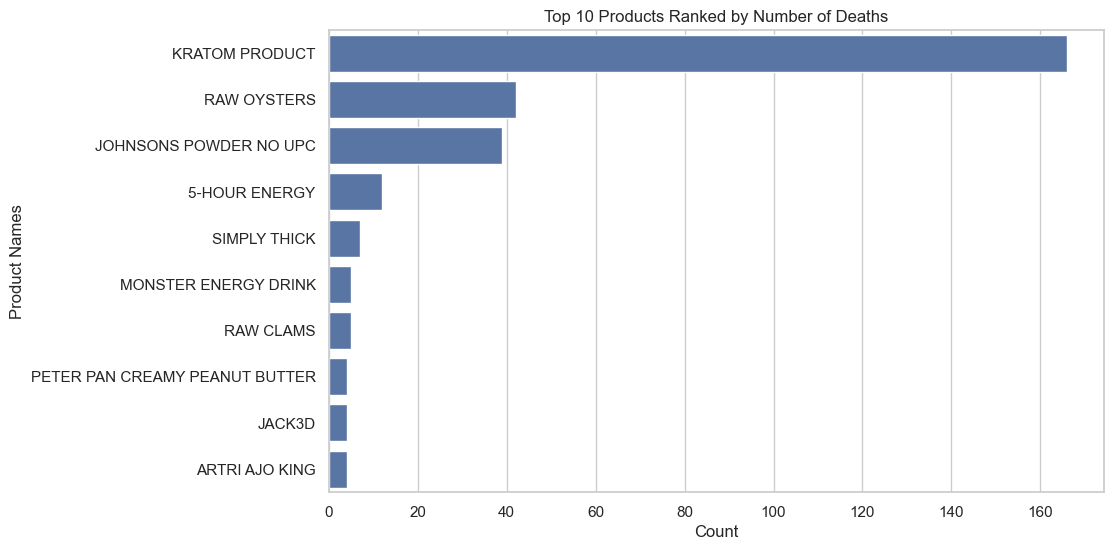

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(y='PRODUCTS_MODIFIED', data=death_only, order=death_only['PRODUCTS_MODIFIED'].value_counts().index[:10])

plt.title('Top 10 Products Ranked by Number of Deaths')
plt.xlabel('Count')
plt.ylabel('Product Names')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='DESCRIPTION', data=death_only, order=death_only['DESCRIPTION'].value_counts().index[:10])

plt.title('Top 10 Product Types Ranked by Number of Deaths')
plt.xlabel('Count')
plt.ylabel('Product Types')

plt.show()

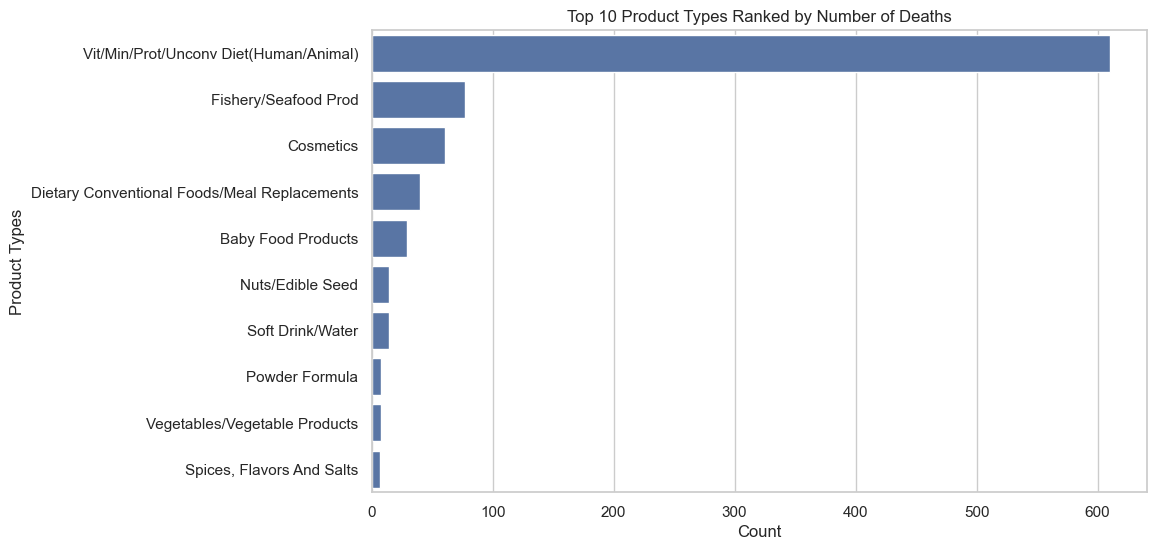

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='DESCRIPTION', data=death_only, order=death_only['DESCRIPTION'].value_counts().index[:10])

plt.title('Top 10 Product Types Ranked by Number of Deaths')
plt.xlabel('Count')
plt.ylabel('Product Types')

plt.show()

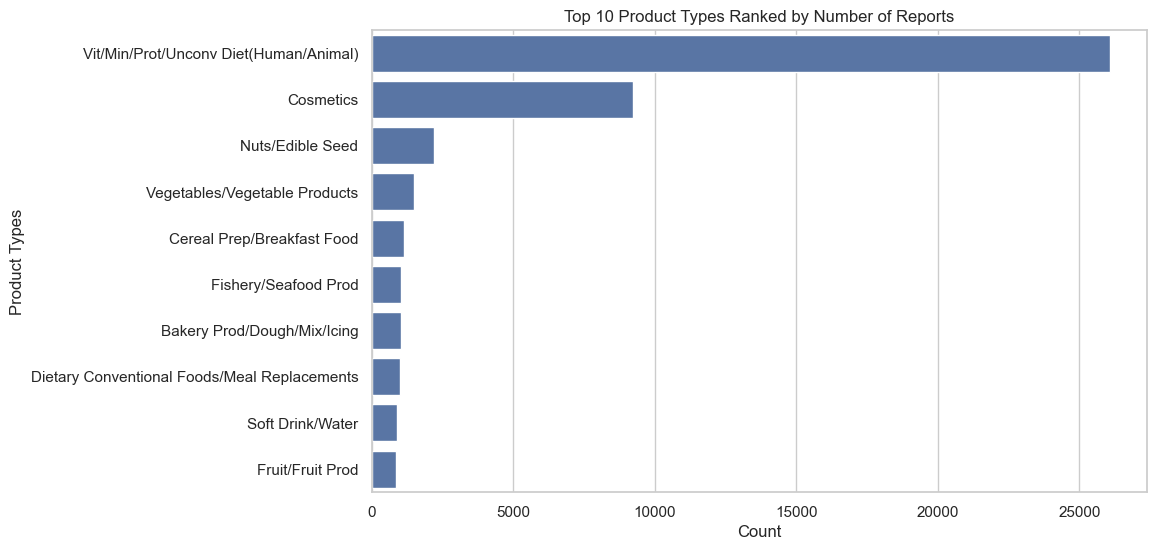

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='DESCRIPTION', data=data, order=data['DESCRIPTION'].value_counts().index[:10])

plt.title('Top 10 Product Types Ranked by Number of Reports')
plt.xlabel('Count')
plt.ylabel('Product Types')

plt.show()

In [ ]:
death_only['DATE'] = pd.to_datetime(death_only['DATE_EVENT'], format='%m/%d/%Y')

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/3082695156.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
death_only_kratom_new = death_only.loc[death_only['PRODUCTS_MODIFIED'] == 'KRATOM PRODUCT']

In [ ]:
death_only_kratom_new

,index,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS,SEPARATED_OUTCOMES,CASE_TERMS_CLEAN,PRODUCTS_MODIFIED,DATE
4,618,5/25/2023,2023-CFS-005417,8/11/2022,SUSPECT,STAR KRATOM GREEN DRAGON,54,Vit/Min/Prot/Unconv Diet(Human/Animal),30.0,year(s),Male,"Death, Hallucination","Death, Hospitalization, Visited a Health Care ...",30.0,Death,"death, hallucination",KRATOM PRODUCT,2022-08-11
6,917,5/9/2023,2023-CFS-004798,11/7/2022,SUSPECT,EARTH KRATOM TRAINWRECK KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),24.0,year(s),Male,"Death, Seizure, Toxicity to various agents","Death, Life Threatening, Hospitalization",24.0,Death,"death, seizure, toxicity to various agents",KRATOM PRODUCT,2022-11-07
7,918,5/9/2023,2023-CFS-004798,11/7/2022,SUSPECT,KRAVE BOTANICALS TRAINWRECK KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),24.0,year(s),Male,"Death, Seizure, Toxicity to various agents","Death, Life Threatening, Hospitalization",24.0,Death,"death, seizure, toxicity to various agents",KRATOM PRODUCT,2022-11-07
8,1042,5/3/2023,2023-CFS-004582,4/6/2023,SUSPECT,KRATOM CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),23.3,year(s),Female,"Death, Hepatic failure, Renal failure","Death, Life Threatening, Hospitalization, Visi...",23.3,Death,"death, hepatic failure, renal failure",KRATOM PRODUCT,2023-04-06
9,1146,4/27/2023,2023-CFS-004369,8/14/2020,SUSPECT,KRATOM DRINK,29,Soft Drink/Water,32.0,year(s),Male,Death,Death,32.0,Death,death,KRATOM PRODUCT,2020-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,107247,5/26/2017,212473,2/2/2017,SUSPECT,KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),25.0,year(s),Male,"Alopecia, Death, Decreased appetite, Irritabil...",Death,25.0,Death,"alopecia, death, decreased appetite, irritabil...",KRATOM PRODUCT,2017-02-02
450,123828,8/9/2016,199949,7/6/2015,SUSPECT,KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,year(s),Male,"Convulsion, Death, Toxicity to various agents",Death,45.0,Death,"convulsion, death, toxicity to various agents",KRATOM PRODUCT,2015-07-06
453,126660,7/18/2016,198584,4/24/2016,SUSPECT,KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),22.0,year(s),Male,"Aspiration, Brain oedema, Cardiomegaly, Death,...",Death,22.0,Death,"aspiration, brain oedema, cardiomegaly, death,...",KRATOM PRODUCT,2016-04-24
488,135668,11/6/2015,191303,6/28/2015,SUSPECT,KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),27.0,year(s),Male,"Arrhythmia, Death, Toxicity to various agents",Death,27.0,Death,"arrhythmia, death, toxicity to various agents",KRATOM PRODUCT,2015-06-28


In [ ]:
death_only_kratom_new.to_csv(wd + "death_only_kratom_new.csv")

In [ ]:
df = death_only_kratom_new

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/1704363599.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




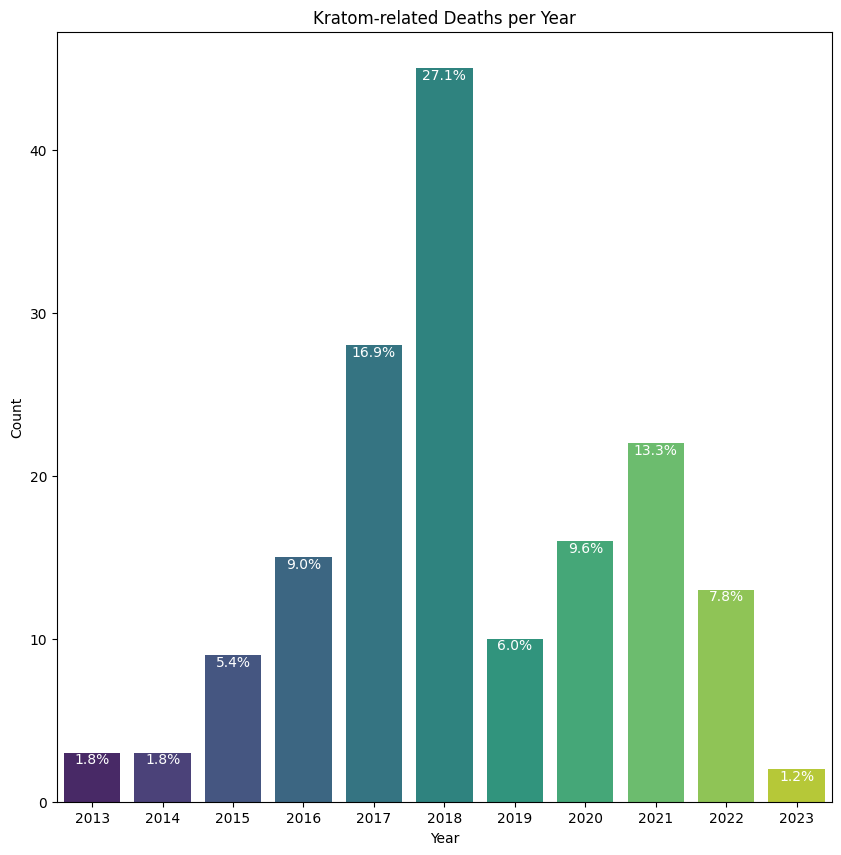

In [ ]:
plt.figure(figsize=(10, 10))

sns.countplot(x=df['DATE'].dt.year, palette='viridis')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Kratom-related Deaths per Year')

total = len(df['DATE'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='top', fontsize=10, color='white')

plt.show()

In [ ]:
death_only_kratom_new.dtypes

index                                      int64
DATE_FDA_FIRST_RECEIVED_REPORT            object
REPORT_ID                                 object
DATE_EVENT                                object
PRODUCT_TYPE                              object
PRODUCT                                   object
PRODUCT_CODE                              object
DESCRIPTION                               object
PATIENT_AGE                              float64
AGE_UNITS                                 object
SEX                                       object
CASE_MEDDRA_PREFERRED_TERMS               object
CASE_OUTCOME                              object
PATIENT_AGE_IN_YEARS                     float64
SEPARATED_OUTCOMES                        object
CASE_TERMS_CLEAN                          object
PRODUCTS_MODIFIED                         object
DATE                              datetime64[ns]
dtype: object

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/3329272274.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w6/c0yczxbj1d35l07312qf5fv80000gp/T/ipykernel_20672/3329272274.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



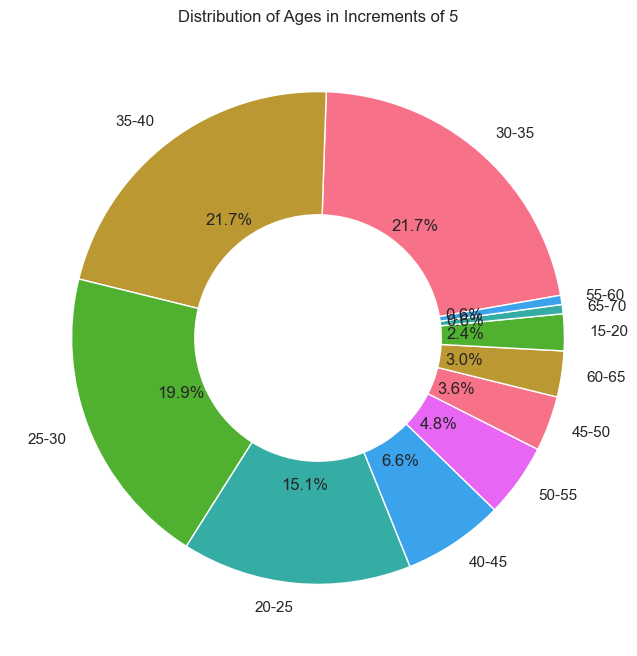

In [ ]:
death_only_kratom_new['PATIENT_AGE_GROUP_5'] = pd.cut(death_only_kratom_new['PATIENT_AGE_IN_YEARS'], bins=range(0, int(max(death_only_kratom_new['PATIENT_AGE_IN_YEARS'])) + 6, 5), right=False)
death_only_kratom_new['PATIENT_AGE_GROUP_5'] = death_only_kratom_new['PATIENT_AGE_GROUP_5'].astype(str).str.replace('(', '').str.replace(']', '').str.replace('[', '').str.replace(')', '').str.replace(', ', '-')

plt.figure(figsize=(8, 8))

sns.set(style="whitegrid")
age_group_counts = death_only_kratom_new['PATIENT_AGE_GROUP_5'].value_counts()
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=10, colors=sns.color_palette('husl'), wedgeprops=dict(width=0.5))

plt.title('Distribution of Ages in Increments of 5')

plt.show()

In [ ]:
import gensim as gensim
from gensim import corpora
import pyLDAvis as pyLDAvis
import pickle as pickle

def lda_visualizations(df, num_topics):
    list_final = [row.split(', ') for row in df['CASE_TERMS_CLEAN']]
    dictionary = corpora.Dictionary(list_final)
    corpus = [dictionary.doc2bow(word_list) for word_list in list_final]
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)
    doc_lda = lda_model[corpus]
    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join(wd + 'results/ldavis_prepared_'+str(num_topics))
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
    return LDAvis_prepared



In [ ]:
def lda_visualizations_new(df, num_topics):
    list_final = [row.split(', ') for row in df['CASE_TERMS_CANCER']]
    dictionary = corpora.Dictionary(list_final)
    corpus = [dictionary.doc2bow(word_list) for word_list in list_final]
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)
    doc_lda = lda_model[corpus]
    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join(wd + 'results/ldavis_prepared_'+str(num_topics))
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
    return LDAvis_prepared

In [ ]:
death_only_new = pd.read_csv(wd + "death_only_final_fixed.csv")

In [ ]:
death_only_johnson_powder = death_only_new.loc[death_only_new['PRODUCT'] == 'JOHNSONS POWDER NO UPC']

In [ ]:
death_only_johnson_powder

,Column 1,index,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,PATIENT_AGE_IN_YEARS,SEPARATED_OUTCOMES,CASE_TERMS_CLEAN,CASE_TERMS_CANCER
16,16,2847,02/14/2023,2023-CFS-006729,02/12/2016,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,60.0,year(s),Female,"Death, Ovarian cancer stage III","Death, Other Serious or Important Medical Event",60.0,Death,"death, ovarian cancer stage iii","death, ovarian cancer"
17,17,2848,02/14/2023,2023-CFS-006728,10/21/2011,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,65.0,year(s),Female,"Death, Ovarian cancer stage III","Death, Hospitalization, Other Serious or Impor...",65.0,Death,"death, ovarian cancer stage iii","death, ovarian cancer"
18,18,2912,02/13/2023,2023-CFS-006724,02/05/2016,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,68.0,year(s),Female,"Death, Uterine cancer","Death, Hospitalization, Other Serious or Impor...",68.0,Death,"death, uterine cancer","death, uterine cancer"
20,20,3011,02/10/2023,2023-CFS-006711,12/16/2011,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,53.0,year(s),Female,"Death, Ovarian cancer stage III","Death, Hospitalization, Other Serious or Impor...",53.0,Death,"death, ovarian cancer stage iii","death, ovarian cancer"
21,21,3085,02/08/2023,2023-CFS-006659,07/24/2020,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,58.0,year(s),Female,"Death, Ovarian cancer","Death, Hospitalization, Other Serious or Impor...",58.0,Death,"death, ovarian cancer","death, ovarian cancer"
22,22,3088,02/08/2023,2023-CFS-006656,07/30/2019,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,63.0,year(s),Female,"Death, Ovarian cancer","Death, Hospitalization, Other Serious or Impor...",63.0,Death,"death, ovarian cancer","death, ovarian cancer"
24,24,3091,02/08/2023,2023-CFS-006654,06/11/2007,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,60.0,year(s),Female,"Death, Ovarian cancer","Death, Hospitalization, Other Serious or Impor...",60.0,Death,"death, ovarian cancer","death, ovarian cancer"
25,25,3100,02/08/2023,2023-CFS-006645,12/06/2021,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,71.0,year(s),Female,"Death, Fallopian tube cancer, Ovarian cancer","Death, Hospitalization, Other Serious or Impor...",71.0,Death,"death, fallopian tube cancer, ovarian cancer","death, fallopian tube cancer, ovarian cancer"
26,26,3101,02/08/2023,2023-CFS-006644,03/08/2010,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,56.0,year(s),Female,"Death, Ovarian cancer","Death, Hospitalization, Other Serious or Impor...",56.0,Death,"death, ovarian cancer","death, ovarian cancer"
29,29,3273,02/03/2023,2023-CFS-006695,01/30/2019,SUSPECT,JOHNSONS POWDER NO UPC,53,Cosmetics,63.0,year(s),Female,"Death, Malignant peritoneal neoplasm","Death, Hospitalization, Other Serious or Impor...",63.0,Death,"death, malignant peritoneal neoplasm","death, malignant peritoneal neoplasm"


In [ ]:
lda_visualizations_new(death_only_johnson_powder, 10)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.158525  0.002375       1        1  29.176374
9      0.188204  0.026429       2        1  24.543301
7      0.054979 -0.071113       3        1  13.608239
3      0.059546  0.101063       4        1   7.416880
0     -0.033840 -0.096843       5        1   4.738532
4     -0.033822 -0.096824       6        1   4.738525
5     -0.062247  0.028623       7        1   4.738278
1     -0.062225  0.028661       8        1   4.738278
2     -0.134560  0.038794       9        1   3.150796
8     -0.134559  0.038834      10        1   3.150796, topic_info=                         Term       Freq      Total Category  logprob  loglift
0                       death  32.000000  32.000000  Default  12.0000  12.0000
3       fallopian tube cancer   7.000000   7.000000  Default  11.0000  11.0000
5          endometrial cancer   3.000000   3.000000  Default  10.0000  10.0000
6   ovarian cancer metastatic   2.000000   2.000000  Default   9.0000   9.0000
2              uterine cancer   2.000000   2.000000  Default   8.0000   8.0000
..                        ...        ...        ...      ...      ...      ...
6   ovarian cancer metastatic   0.220367   2.574822  Topic10  -2.4858   0.9993
5          endometrial cancer   0.220377   3.340933  Topic10  -2.4857   0.7388
3       fallopian tube cancer   0.220522   7.507051  Topic10  -2.4851  -0.0701
1              ovarian cancer   0.221495  23.607279  Topic10  -2.4807  -1.2114
0                       death   0.221437  32.961025  Topic10  -2.4809  -1.5454

[132 rows x 6 columns], token_table=      Topic      Freq                           Term
term                                                
9         1  0.552454                    atelectasis
0         1  0.333727                          death
0         2  0.303389                          death
0         3  0.121355                          death
0         4  0.060678                          death
0         5  0.060678                          death
0         6  0.060678                          death
0         7  0.030339                          death
0         8  0.030339                          death
5         4  0.598635             endometrial cancer
3         1  0.133208          fallopian tube cancer
3         3  0.532832          fallopian tube cancer
3         5  0.133208          fallopian tube cancer
3         6  0.133208          fallopian tube cancer
8         1  0.552438                         injury
10        1  0.552446      interstitial lung disease
4         6  0.476923  malignant peritoneal neoplasm
7         5  0.476916             neoplasm malignant
1         1  0.423598                 ovarian cancer
1         2  0.423598                 ovarian cancer
1         3  0.084720                 ovarian cancer
1         4  0.042360                 ovarian cancer
6         8  0.388376      ovarian cancer metastatic
11        1  0.552450                      pneumonia
2         7  0.388380                 uterine cancer, R=12, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 8, 4, 1, 5, 6, 2, 3, 9])

In [ ]:
lda_visualizations(death_only_kratom_new, 10)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.130198 -0.012981       1        1  25.278638
0     -0.020921  0.022596       2        1  14.324634
1     -0.110781 -0.036268       3        1  12.638105
6      0.078875 -0.102440       4        1   9.145308
5     -0.038994  0.110795       5        1   8.616094
4     -0.039469  0.038178       6        1   7.729828
9     -0.003368 -0.098863       7        1   7.535049
3      0.067358  0.036635       8        1   5.641358
8      0.030251  0.008840       9        1   5.595765
2      0.167248  0.033507      10        1   3.495220, topic_info=                           Term        Freq       Total Category  logprob  \
16                     overdose   14.000000   14.000000  Default  30.0000   
0                         death  135.000000  135.000000  Default  29.0000   
3    toxicity to various agents   77.000000   77.000000  Default  28.0000   
38             accidental death   19.000000   19.000000  Default  27.0000   
11                   convulsion   14.000000   14.000000  Default  26.0000   
..                          ...         ...         ...      ...      ...   
26                    poisoning    0.089072    2.595403  Topic10  -5.4293   
2                       seizure    0.089072    2.316843  Topic10  -5.4293   
28                   drug abuse    0.089071    2.433844  Topic10  -5.4293   
109            drug interaction    0.089070    1.690624  Topic10  -5.4293   
29                 brain injury    0.089070    3.145963  Topic10  -5.4293   

     loglift  
16   30.0000  
0    29.0000  
3    28.0000  
38   27.0000  
11   26.0000  
..       ...  
26   -0.0183  
2     0.0953  
28    0.0460  
109   0.4103  
29   -0.2107  

[450 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
6         2  0.417865         abnormal behaviour
6         8  0.417865         abnormal behaviour
38        1  0.412155           accidental death
38        2  0.154558           accidental death
38        3  0.051519           accidental death
...     ...       ...                        ...
10        1  0.305015           weight decreased
10        8  0.610030           weight decreased
17        4  0.377637  wernicke's encephalopathy
17       10  0.377637  wernicke's encephalopathy
24        2  0.645809        withdrawal syndrome

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 2, 7, 6, 5, 10, 4, 9, 3])

In [ ]:
lda_visualizations(alcoholic_beverage, 5)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.249299 -0.131448       1        1  26.570772
1     -0.147512  0.096150       2        1  22.723022
3     -0.213655 -0.166217       3        1  20.883113
0      0.050113  0.086295       4        1  15.854058
2      0.061755  0.115219       5        1  13.969035, topic_info=                                   Term       Freq      Total Category  \
12                             vomiting  14.000000  14.000000  Default   
18                           aggression   9.000000   9.000000  Default   
4                      hypersensitivity   5.000000   5.000000  Default   
41                 respiration abnormal   5.000000   5.000000  Default   
37  activities of daily living impaired   5.000000   5.000000  Default   
..                                  ...        ...        ...      ...   
3                               malaise   0.101993   1.661765   Topic5   
18                           aggression   0.593527   9.793962   Topic5   
23                           chest pain   0.594684   9.945572   Topic5   
24                   troponin increased   0.593624   9.931129   Topic5   
4                      hypersensitivity   0.103779   5.406519   Topic5   

    logprob  loglift  
12  30.0000  30.0000  
18  29.0000  29.0000  
4   28.0000  28.0000  
41  27.0000  27.0000  
37  26.0000  26.0000  
..      ...      ...  
3   -5.8440  -0.8224  
18  -4.0828  -0.8351  
23  -4.0808  -0.8485  
24  -4.0826  -0.8489  
4   -5.8266  -1.9848  

[209 rows x 6 columns], token_table=      Topic      Freq                  Term
term                                       
1         3  0.838515  abdominal discomfort
2         3  0.838719        abdominal pain
9         5  0.701193  abdominal pain upper
30        1  0.804857    abnormal behaviour
30        4  0.114980    abnormal behaviour
...     ...       ...                   ...
24        5  0.100693    troponin increased
12        2  0.355695              vomiting
12        3  0.071139              vomiting
12        4  0.284556              vomiting
12        5  0.284556              vomiting

[96 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

In [ ]:
lda_visualizations(death_only_kratom, 10)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.121210  0.009152       1        1  25.978406
9      0.035660  0.062123       2        1  13.750399
8     -0.042380  0.088427       3        1  12.014519
4      0.062462  0.031809       4        1  11.476756
5      0.049198 -0.107378       5        1  10.028345
0      0.061530 -0.027844       6        1   9.220668
6     -0.062932  0.071406       7        1   6.690657
3     -0.154253 -0.037442       8        1   3.868469
2     -0.018772 -0.015711       9        1   3.527270
7     -0.051722 -0.074541      10        1   3.444511, topic_info=                          Term        Freq       Total Category  logprob  \
3   toxicity to various agents   97.000000   97.000000  Default  30.0000   
17                    overdose   20.000000   20.000000  Default  29.0000   
0                        death  175.000000  175.000000  Default  28.0000   
88         visceral congestion    8.000000    8.000000  Default  27.0000   
57                     obesity    9.000000    9.000000  Default  26.0000   
..                         ...         ...         ...      ...      ...   
17                    overdose    0.076935   20.419518  Topic10  -5.9568   
12                  convulsion    0.076881   15.370022  Topic10  -5.9575   
14              cardiac arrest    0.076821    9.245238  Topic10  -5.9583   
59            pulmonary oedema    0.076809   24.592483  Topic10  -5.9585   
19           completed suicide    0.076798    6.834013  Topic10  -5.9586   

    loglift  
3   30.0000  
17  29.0000  
0   28.0000  
88  27.0000  
57  26.0000  
..      ...  
17  -2.2129  
12  -1.9295  
14  -1.4220  
59  -2.4005  
19  -1.1201  

[478 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
6         7  0.433608         abnormal behaviour
6        10  0.433608         abnormal behaviour
46        1  0.313079           accidental death
46        2  0.093924           accidental death
46        3  0.093924           accidental death
...     ...       ...                        ...
10        7  0.336770           weight decreased
18        3  0.410201  wernicke's encephalopathy
18        8  0.410201  wernicke's encephalopathy
29        2  0.447466        withdrawal syndrome
29        6  0.447466        withdrawal syndrome

[371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 9, 5, 6, 1, 7, 4, 3, 8])

In [ ]:
death_only_raw_oyster = death_only[death_only['PRODUCT'].str.contains('RAW OYSTERS')]

In [ ]:
lda_visualizations(death_only_raw_oyster, 10)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.042697 -0.064805       1        1  19.041353
5     -0.065291  0.047908       2        1  17.868396
2     -0.043999  0.062486       3        1  12.556047
8     -0.035571 -0.047013       4        1  11.717412
7      0.019149 -0.054608       5        1  11.279474
9     -0.055390 -0.036519       6        1   8.536099
4      0.051746 -0.054426       7        1   7.195913
3     -0.063248  0.074584       8        1   5.655012
6      0.111792  0.080799       9        1   4.848444
0      0.123508 -0.008406      10        1   1.301851, topic_info=                                  Term       Freq      Total Category  \
8                              malaise  15.000000  15.000000  Default   
0                                death  43.000000  43.000000  Default   
16  feeling of body temperature change  15.000000  15.000000  Default   
39                     hospitalisation   8.000000   8.000000  Default   
19                            headache   5.000000   5.000000  Default   
..                                 ...        ...        ...      ...   
39                     hospitalisation   0.088086   8.438729  Topic10   
5                               sepsis   0.088084   6.354204  Topic10   
7                   lymphatic disorder   0.088080   5.379965  Topic10   
21                       skin disorder   0.088079   5.198848  Topic10   
24                  dermatitis bullous   0.088075   6.018992  Topic10   

    logprob  loglift  
8   30.0000  30.0000  
0   29.0000  29.0000  
16  28.0000  28.0000  
39  27.0000  27.0000  
19  26.0000  26.0000  
..      ...      ...  
39  -3.8501  -0.2209  
5   -3.8501   0.0628  
7   -3.8502   0.2292  
21  -3.8502   0.2634  
24  -3.8502   0.1169  

[451 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
17        1  0.213166  abdominal pain
17        4  0.106583  abdominal pain
17        5  0.213166  abdominal pain
17        6  0.213166  abdominal pain
17        7  0.106583  abdominal pain
...     ...       ...             ...
6         3  0.111394        vomiting
6         4  0.278485        vomiting
6         5  0.167091        vomiting
6         6  0.111394        vomiting
6         7  0.111394        vomiting

[145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 3, 9, 8, 10, 5, 4, 7, 1])